In [1]:
!pip install easyocr


In [2]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=af048571c9183aa745804c50bc20c2a33b98f0647e1bfd0b879909b94e3f478c
  Stored in directory: c:\users\artimarthak\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils


In [68]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

In [69]:
#read img
img = cv2.imread('C:/Users/ArtiMarthak/Downloads/cv/nick/ANPRwithPython-main/ANPRwithPython-main/data/image2.jpg')

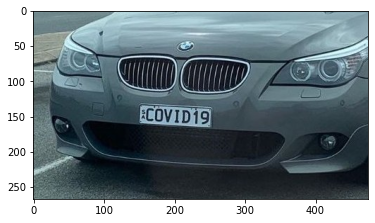

In [70]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [13]:
gray.shape

(267, 475)

error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1340: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


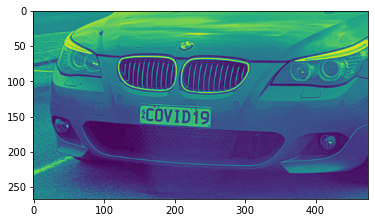

In [57]:
plt.imshow(gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [71]:
#apply filter & find edges
bfilter = cv2.bilateralFilter(gray,11,17,17)
#blur out more background information, but be careful that the useful part does not get blurred.
#noise reduction
bfilter

array([[141, 141, 141, ..., 146, 146, 146],
       [139, 139, 139, ..., 146, 146, 146],
       [138, 138, 138, ..., 146, 146, 147],
       ...,
       [145, 149, 112, ...,  82,  84,  86],
       [123, 117, 110, ...,  79,  79,  79],
       [118, 105, 115, ...,  80,  79,  78]], dtype=uint8)

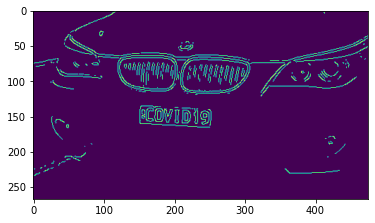

In [77]:
#or we can use gussian blur for noise reduction
blur = cv2.GaussianBlur(gray,(5,5),0)

#paas to canny for edge detection
canny = cv2.Canny(blur,threshold1=205,threshold2=210)
# canny
plt.imshow(canny)
# # (this is necessary to avoid Python kernel form crashing)
# cv2.waitKey(0)
  
# # closing all open windows
# cv2.destroyAllWindows()

In [73]:
blur

array([[145, 146, 146, ..., 142, 144, 144],
       [143, 144, 144, ..., 143, 145, 145],
       [140, 140, 140, ..., 147, 147, 147],
       ...,
       [139, 133, 120, ...,  82,  83,  84],
       [126, 122, 117, ...,  83,  83,  83],
       [119, 116, 115, ...,  82,  82,  82]], dtype=uint8)

In [16]:
edged = cv2.Canny(bfilter,30,200)#edge detection
#edge detection.
edged

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

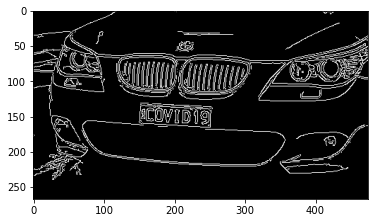

In [17]:
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [27]:
#find contours & apply mask
keypoint = cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoint)
contours = sorted(contours,key=cv2.contourArea,reverse=True)[:10]
#detected we sort them from big to small and consider only the first 10 results ignoring the others. 

In [29]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour,10,True)
    if len(approx) == 4:
        location = approx
        break

In [30]:
location

array([[[152, 136]],

       [[248, 139]],

       [[251, 164]],

       [[153, 160]]], dtype=int32)

In [31]:
#proceed with masking the entire picture except for the place where the number plate is. 
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[location],0,255,-1)
new_image = cv2.bitwise_and(img,img,mask=mask)

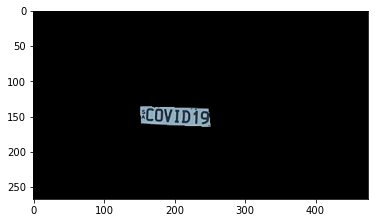

In [33]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [35]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x),np.min(y))
(x2,y2) = (np.max(x),np.max(y))
cropped_image = gray[x1:x2+1,y1:y2+1]

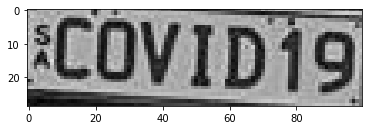

In [36]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

In [37]:
# read the number plate information from the segmented image. 
#easy OCR to read text
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[0, 0], [100, 0], [100, 29], [0, 29]], 'ICOVIDT9', 0.5275640804797114)]

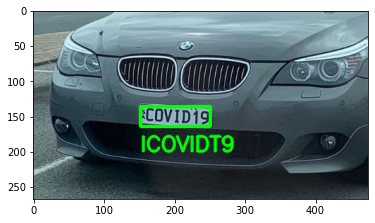

In [45]:
#render result
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res= cv2.putText(img,text=text,org=(approx[0][0][0],approx[1][0][1]+60),fontFace=font,fontScale=1,color=(0,255,0),thickness=2,lineType=cv2.LINE_AA)
res = cv2.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]),(0,255,0),3)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))

In [78]:
#export edges
import numpy as np


In [79]:
np.savetxt('edges.csv',edged,delimiter=',')

In [80]:
cv2.imwrite('edges.jpg',edged)

True